In [1]:
import pandas as pd

#import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open(r"..\data\article.txt") as file:
    article = file.read()

# Tokenize the article: tokens
tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
english_stops = stopwords.words("english")
no_stops = [t for t in alpha_only if t not in english_stops]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
#print(bow.most_common(10))

df = pd.DataFrame(bow.most_common(10))
df.rename({0: "Word", 1: "Count"}, axis=1, inplace=True)
df

,Word,Count
0,debugging,30
1,system,23
2,software,16
3,computer,14
4,bug,14
5,problem,14
6,term,13
7,tool,13
8,process,12
9,used,12


### The most common words

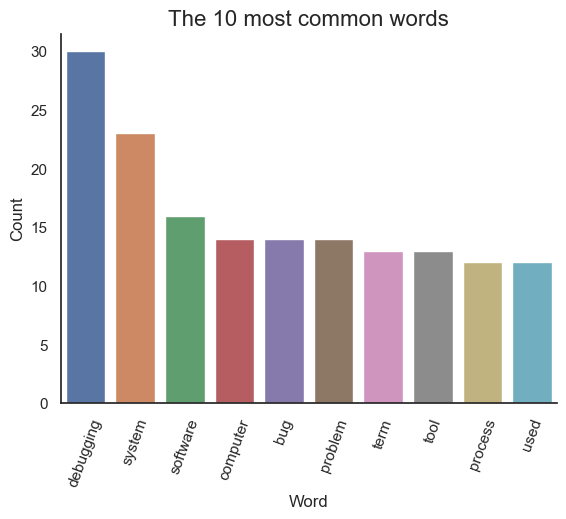

In [3]:
g = sns.set_theme(style="white")
sns.barplot(x="Word", y="Count", data=df).set_title("The 10 most common words", fontsize=16)
plt.xticks(rotation=70)
sns.despine(right=True, top=True)
plt.show()